In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 13.0MB/s]


In [4]:
!unzip pima-indians-diabetes-database.zip -d 221351051

Archive:  pima-indians-diabetes-database.zip
  inflating: 221351051/diabetes.csv  


In [5]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
data = pd.read_csv('221351051/diabetes.csv')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#Pisahkan fitur (x) dan target (y)
X = data.drop("Outcome", axis=1)
y = data ["Outcome"]

In [36]:
# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#Membangun model ANN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],))) #Hidden layer
model.add(Dense(8, activation='relu')) #Hidden layer kedua
model.add(Dense(1, activation='sigmoid')) #output layer untuk klasifikasi biner

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

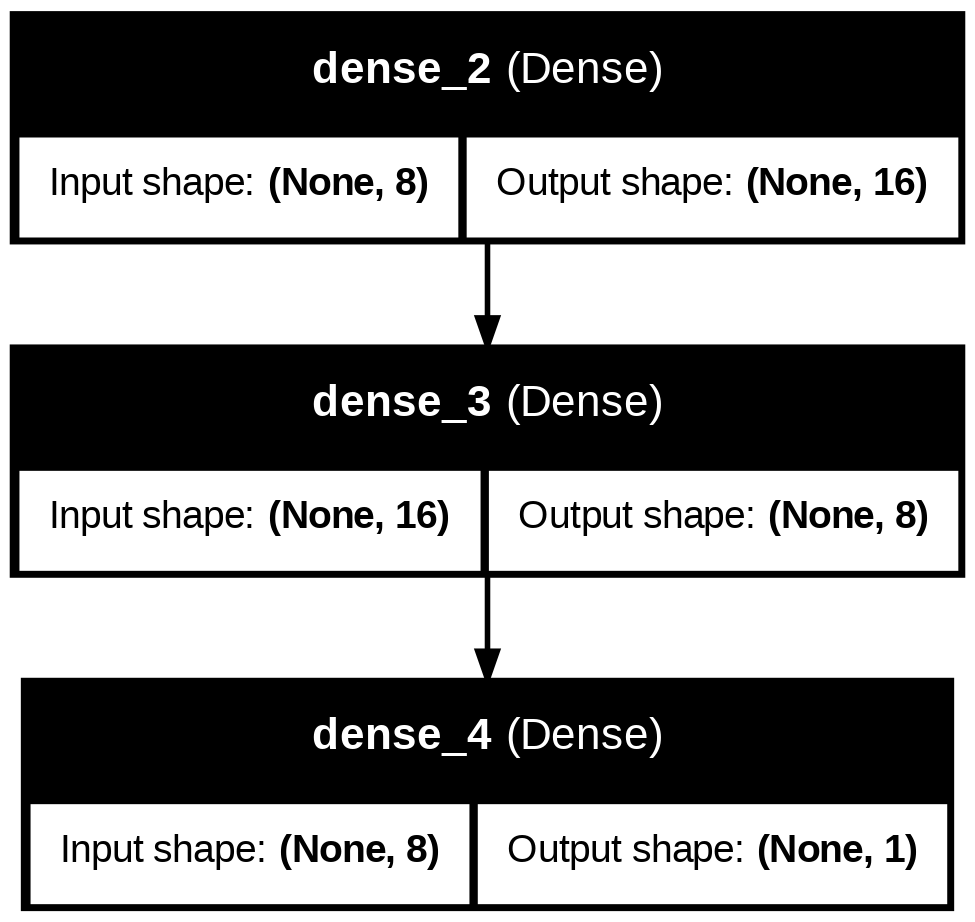

In [42]:
#Plot arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

In [43]:
#Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6189 - loss: 0.6771 - val_accuracy: 0.6098 - val_loss: 0.6477
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6458 - loss: 0.6200 - val_accuracy: 0.6098 - val_loss: 0.6231
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7080 - loss: 0.5695 - val_accuracy: 0.6098 - val_loss: 0.6053
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - loss: 0.5731 - val_accuracy: 0.6341 - val_loss: 0.5849
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6667 - loss: 0.5615 - val_accuracy: 0.6341 - val_loss: 0.5697
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6721 - loss: 0.5369 - val_accuracy: 0.6341 - val_loss: 0.5556
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7173 - loss: 0.5121 - val_accuracy: 0.6667 - val_loss: 0.5406
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7291 - loss: 0.5036 - val_accuracy: 0.6992 - val_loss

In [44]:
#Prediksi pada data test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) #Konversi probabilitas ke kelas biner

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [45]:
#Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 73.38%


In [46]:
#Menampilkan confussion mattrix dan classification report
print("\nConfussion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confussion Matrix:
[[77 22]
 [19 36]]


In [50]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



In [51]:
#Contoh input data baru (8 fitur)
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.637, 50]]) #Contoh data pasien

#Normalisasi input data baru
new_data_scaled = scaler.transform(new_data)

#Prediksi
prediction_prob = model.predict(new_data_scaled)
prediction = (prediction_prob > 0.5).astype(int)

#Hasil prediksi
if prediction[0] == 1:
  print("Pasien diprediksi terkena diabetes")
else:
  print("Pasien diprediksi tidak terkena diabetes")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Pasien diprediksi terkena diabetes


In [52]:
model.save("diabetes_model.h5")

In [55]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
#Membnagun model ANN optimasi
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=12(0.01)))
Dropout(0.3)
model.add(Dense(64, activation='relu', kernel_regularizer=(0.01)))
Dropout(0.3)